In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
sns.set()

df=pd.read_csv('/content/drive/MyDrive/tweet_sentiment.csv')

df.head()

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


In [ ]:
rename = {"cleaned_tweets": "statement", "sentiment": "sentiment"}
df.rename(columns = rename, inplace=True)

In [ ]:
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21995 entries, 0 to 28435
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  21994 non-null  object
 1   sentiment  21995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


In [ ]:
df['sentiment'].replace({-1: 'negatif', 0: 'netral', 1: 'positif'}, inplace=True)

df.head()

,statement,sentiment
0,video offic mind busi david solomon tell gs in...,netral
1,price lumber lb f sinc hit ytd high maci turna...,netral
2,say american dream dead,negatif
3,barri silbert extrem optimist bitcoin predict ...,positif
4,satellit avoid attack space junk circl earth paid,negatif


In [ ]:
df.describe()

,statement,sentiment
count,21994,21995
unique,21994,3
top,video offic mind busi david solomon tell gs in...,netral
freq,1,13129


# WordCloud

In [ ]:
# Mengganti nilai-nilai float dengan string kosong
df['statement'] = df['statement'].astype(str)

# Menggabungkan string
text = " ".join([str(x) for x in df['statement']])


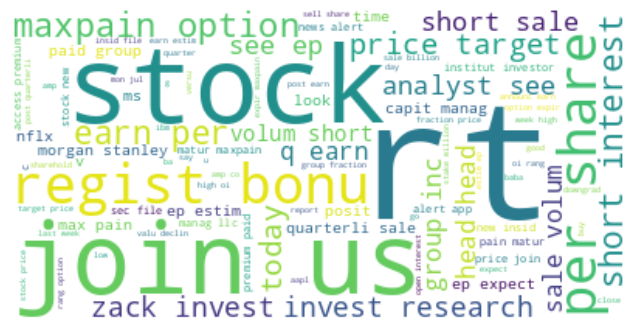

In [ ]:
text = " ".join([x for x in df.statement])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud Netral

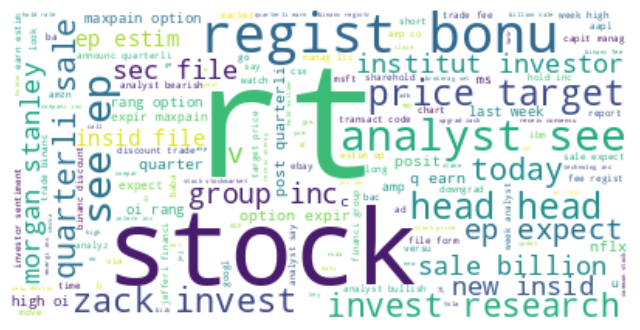

In [ ]:
text = " ".join([x for x in df.statement[df.sentiment=='netral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud Positive

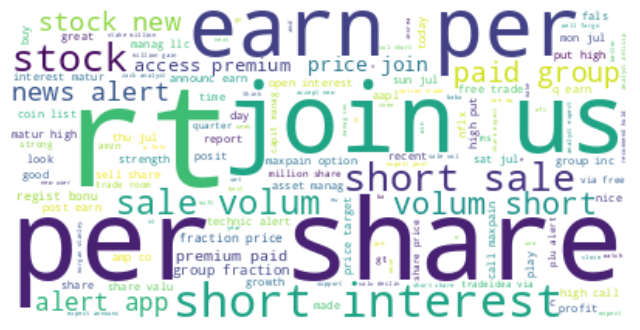

In [ ]:
text = " ".join([x for x in df.statement[df.sentiment=='positif']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud Negatif

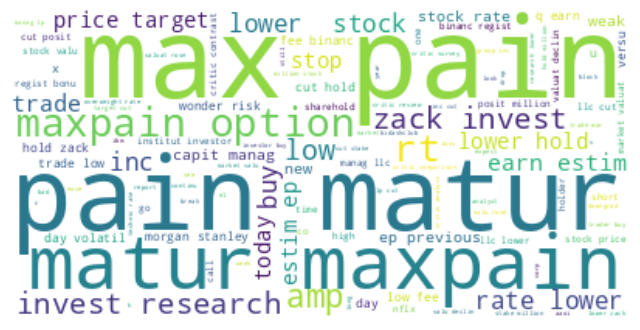

In [ ]:
text = " ".join([x for x in df.statement[df.sentiment=='negatif']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Jumlah Sentiment

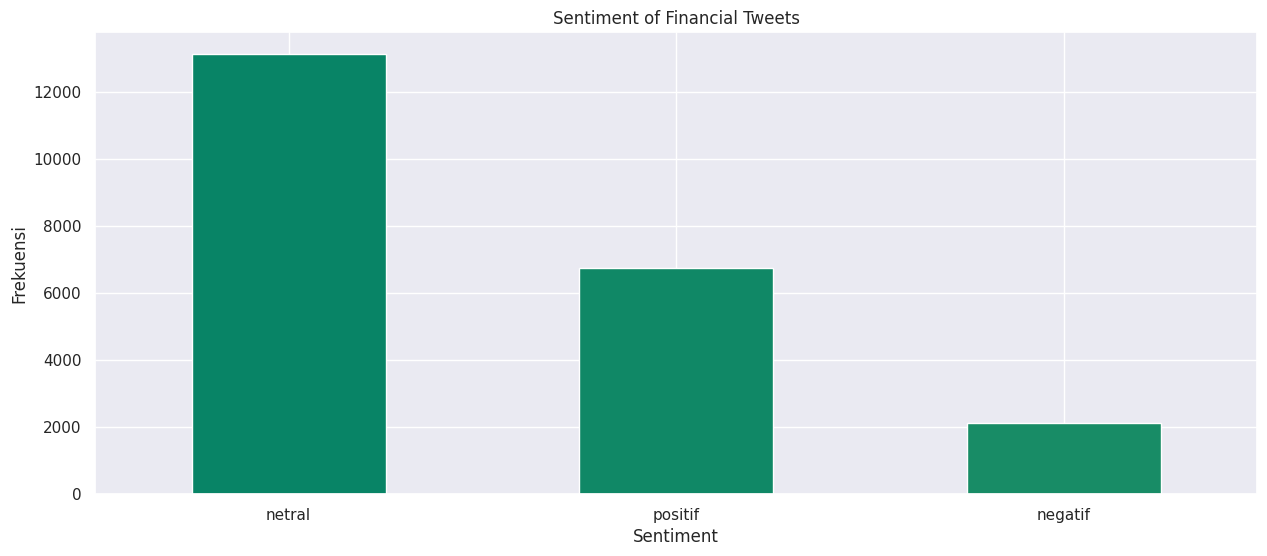

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
df['sentiment'].value_counts()[:30].plot(kind='bar',color=sns.color_palette('summer',30))

plt.title('Sentiment of Financial Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frekuensi')

plt.gca().tick_params(axis='x', rotation=0)

In [ ]:
df['sentiment'].value_counts()

netral     13129
positif     6752
negatif     2114
Name: sentiment, dtype: int64

# Build Train and Test Dataframes

In [ ]:
train,eva = train_test_split(df,test_size = 0.2)

### Building a Model

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.0 MB

In [ ]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st=='positif'):
        return 0
    elif(st=='netral'):
        return 2
    else:
        return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(17596, 3)


In [ ]:
train_df.head()

,text,label
12498,cpb seen bullish flow campbel soup last week,2
26174,dvn new sec file dvn form k,2
21943,want sell ph g dle iam album poster pentagon c...,1
20773,morn marketwatch john gillin bring news mix ma...,2
13084,goldman sach group lower deer amp compani de buy,1


In [ ]:
train_df = pd.DataFrame({
    'text': train['statement'][:14076].replace(r'\n', ' ', regex=True),
    'label': train['label'][:14076]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-3519:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-3519:]
})

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14076 entries, 12498 to 21567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    14076 non-null  object
 1   label   14076 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 329.9+ KB


In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/14076 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1760 [00:00<?, ?it/s]

(1760, 0.281280692470252)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3519 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/440 [00:00<?, ?it/s]

# Model Evaluation

In [ ]:
result

{'mcc': 0.9244054679585219, 'eval_loss': 0.1898639931888531}

In [ ]:
model_outputs

array([[-2.46122122, -2.96588039,  4.43262768],
       [-2.69015265,  4.55707121, -1.07757223],
       [-1.54432142, -1.31448519,  2.10966682],
       ...,
       [-2.7215929 , -3.05512524,  4.77531099],
       [-2.72882032, -2.98928022,  4.71430397],
       [-2.08311605, -2.20594692,  3.46349072]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 998,    8,   55],
       [   2,  296,   41],
       [  27,    9, 2083]])

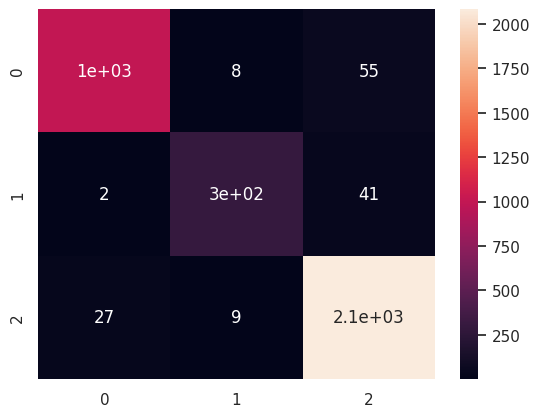

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positif','netral','negatif']))

              precision    recall  f1-score   support

     positif       0.97      0.94      0.96      1061
      netral       0.95      0.87      0.91       339
     negatif       0.96      0.98      0.97      2119

    accuracy                           0.96      3519
   macro avg       0.96      0.93      0.94      3519
weighted avg       0.96      0.96      0.96      3519



In [ ]:
print(sklearn.metrics.accuracy_score(true,predicted))

0.9596476271668087


# Give Your Statement

In [ ]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positif',1:'negative',2:'netral'}
    print(sentiment_dict[pos])
    return

In [ ]:
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

netral


In [ ]:
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

negative
